# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("/Users/Jordandass/alpaca.gitignore")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data_raw = requests.get(btc_url)
btc_value = btc_data_raw.json()['data']["1"]['quotes']['USD']['price']

# Fetch current ETH price
eth_data_raw = requests.get(eth_url)
eth_value = eth_data_raw.json()["data"]["1027"]["quotes"]['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59001.60
The current value of your 5.3 ETH is $21559.08


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key,
                     alpaca_secret_key, 
                     api_version = "v2")

In [8]:
# Format current date as ISO format
end = datetime.now()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
portfolio_df = api.get_barset(tickers, timeframe, limit = 1000, end = end).df

# Preview DataFrame
portfolio_df.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189.0   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982.0   
2017-12-29 00:00:00-05:00  109.28  109.3900  109.2400  109.340  2073522.0   
2018-01-02 00:00:00-05:00  109.26  109.3100  108.9700  109.170  5495219.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-12-26 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN  
2017-12-27 00:00:00-05:00  267.36  267.73  267.01  267.33  32573906.0  
2017-12-28 00:00:00-05:00  267.85  267.92  267.45  267.86  23583584.0  
2017-12-29 00:00:00-05:00  268.55  268.55  266.64  266.88  43875796.0  
2018-01-02 00:00:00-05:00  267.84  268.81  267.40  268.80  50844678.0

In [9]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_df.iloc[-1, 3]
spy_close_price = portfolio_df.iloc[-1, 8]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.3
Current SPY closing price: $470.58


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23529.00
The current value of your 200 AGG shares is $22860.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({'': ['crypto', 'shares'], 'amount': [my_btc_value + my_eth_value, my_agg_value + my_spy_value]}).set_index('')

# Display savings DataFrame
display(df_savings)

,amount
,
crypto,80560.675
shares,46389.000


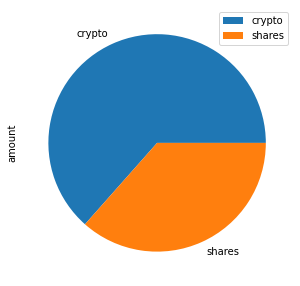

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount', figsize = (5, 5));

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = round(sum(list(df_savings['amount'])),2) 

# Validate saving health
if total_savings == emergency_fund:
    print("Congratulations, you have reached your financial goal")
    print(f"{total_savings} = {emergency_fund}")
elif total_savings > emergency_fund:
    print("Congratulations, you have enough money for this fund!")
    print(f"{total_savings} > {emergency_fund}")
else:
    print("You require more money to enter this fund")
    print(f"{total_savings} < {emergency_fund}")
    print(f"{emergency_fund - total_savings} away from financial goal")

Congratulations, you have enough money for this fund!
126949.68 > 36000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
end = datetime.now().strftime('%Y-%m-%d')
start = (datetime.now() - relativedelta(years=5)).strftime('%Y-%m-%d')

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(tickers, timeframe, start = start, end = end, limit = 1000).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189.0   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982.0   
2017-12-29 00:00:00-05:00  109.28  109.3900  109.2400  109.340  2073522.0   
2018-01-02 00:00:00-05:00  109.26  109.3100  108.9700  109.170  5495219.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-12-26 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN  
2017-12-27 00:00:00-05:00  267.36  267.73  267.01  267.33  32573906.0  
2017-12-28 00:00:00-05:00  267.85  267.92  267.45  267.86  23583584.0  
2017-12-29 00:00:00-05:00  268.55  268.55  266.64  266.88  43875796.0  
2018-01-02 00:00:00-05:00  267.84  268.81  267.40  268.80  50844678.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(df_stock_data, weights = [0.4, 0.6], num_simulation=500, num_trading_days=252*30)

In [17]:
# Printing the simulation input data
MC_30.portfolio_data

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189.0   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982.0   
2017-12-29 00:00:00-05:00  109.28  109.3900  109.2400  109.340  2073522.0   
2018-01-02 00:00:00-05:00  109.26  109.3100  108.9700  109.170  5495219.0   
...                           ...       ...       ...      ...        ...   
2021-12-09 00:00:00-05:00  114.28  114.3860  114.1200  114.200  8223995.0   
2021-12-10 00:00:00-05:00  114.37  114.5100  114.2200  114.240  6263328.0   
2021-12-13 00:00:00-05:00  114.51  114.7050  114.4600  114.600  4006984.0   
2021-12-14 00:00:00-05:00  114.46  114.5400  114.2600  114.410  6247899.0   
2021-12-15 00:00:00-05:00  114.23  114.4450  114.1100  114.300  7232824.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-12-26 00:00:00-05:00          NaN     NaN       NaN     NaN     NaN   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.7300  267.01  267.33   
2017-12-28 00:00:00-05:00    -0.000595  267.85  267.9200  267.45  267.86   
2017-12-29 00:00:00-05:00     0.001099  268.55  268.5500  266.64  266.88   
2018-01-02 00:00:00-05:00    -0.001555  267.84  268.8100  267.40  268.80   
...                                ...     ...       ...     ...     ...   
2021-12-09 00:00:00-05:00     0.000263  468.15  469.6291  466.14  466.34   
2021-12-10 00:00:00-05:00     0.000350  469.23  470.9000  466.51  470.72   
2021-12-13 00:00:00-05:00     0.003151  470.19  470.5600  466.27  466.61   
2021-12-14 00:00:00-05:00    -0.001658  463.05  465.7400  460.25  463.39   
2021-12-15 00:00:00-05:00    -0.000961  463.42  470.8600  460.74  470.58   

                                                    
                               volume daily_return  
time                                                
2017-12-26 00:00:00-05:00         NaN          NaN  
2017-12-27 00:00:00-05:00  32573906.0          NaN  
2017-12-28 00:00:00-05:00  23583584.0     0.001983  
2017-12-29 00:00:00-05:00  43875796.0    -0.003659  
2018-01-02 00:00:00-05:00  50844678.0     0.007194  
...                               ...          ...  
2021-12-09 00:00:00-05:00  54963509.0    -0.006815  
2021-12-10 00:00:00-05:00  64958435.0     0.009392  
2021-12-13 00:00:00-05:00  53533452.0    -0.008731  
2021-12-14 00:00:00-05:00  84376354.0    -0.006901  
2021-12-15 00:00:00-05:00  97945190.0     0.015516  

[1001 rows x 12 columns]

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jordandass/Desktop/monash-fintech/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005091,0.989220,1.011589,1.005679,1.000873,1.005707,1.011525,1.005712,1.002487,1.005517,...,1.002254,1.005211,0.999431,1.011814,0.991792,1.001270,0.989557,0.984914,0.995385,0.987807
2,1.006629,0.992341,1.015021,1.013212,0.991952,1.008385,1.011116,1.009312,1.006666,1.001007,...,0.996997,1.001054,1.010605,1.023168,0.995383,1.011808,1.007812,0.991228,0.999181,0.976077
3,1.015996,0.995391,1.024050,1.014785,0.995286,1.012757,1.016656,1.001797,1.005844,0.988485,...,0.994453,0.989503,1.014981,1.033863,1.005039,1.014347,1.013148,0.999074,0.996219,0.974758
4,0.997837,0.986418,1.015388,1.017280,0.996485,1.013749,1.015903,1.001492,0.999922,0.994782,...,0.995331,1.007257,1.027387,1.032070,1.013317,1.023590,1.000479,0.996264,0.993297,0.978556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.424872,30.034323,21.959180,42.956015,18.060850,12.248311,59.370883,17.824904,53.147284,11.392967,...,11.252539,44.596306,17.242330,34.320244,16.189965,21.277551,3.064251,47.593800,16.178813,30.995695
7557,9.361109,30.097430,22.003992,43.072539,18.162560,12.020441,59.673684,17.809377,53.875325,11.508966,...,11.280079,44.817060,17.277489,34.170531,15.985045,20.933450,3.068462,47.838456,16.210787,31.262310
7558,9.364674,30.409044,22.334109,43.136208,18.076969,12.148337,59.240403,17.999221,54.445549,11.451351,...,11.343498,44.932494,17.370282,34.098061,15.994045,20.798953,3.065559,47.485097,16.528095,31.545927
7559,9.406047,30.246445,22.562798,43.013740,18.068390,12.149382,59.505673,17.983929,53.701433,11.673290,...,11.460390,45.326061,17.284555,34.016195,15.971210,20.988487,3.090663,47.658523,16.623684,31.668532


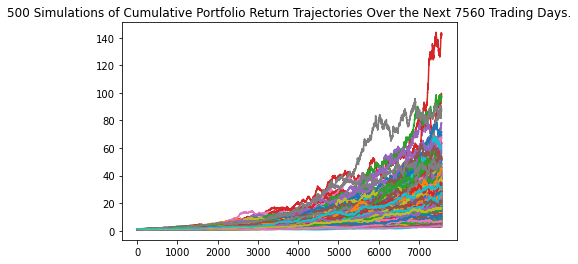

In [19]:
# Plot simulation outcomes
MC_30.plot_simulation();

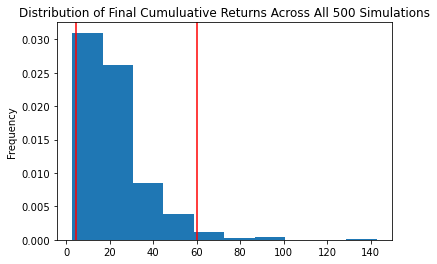

In [20]:
# Plot probability distribution and confidence intervals
MC_30.plot_distribution();

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_MC_30 = MC_30.summarize_cumulative_return()

# Print summary statistics
display(summary_MC_30)

count           500.000000
mean             22.190400
std              15.655428
min               2.772560
25%              11.503325
50%              18.641491
75%              28.363687
max             142.770695
95% CI Lower      4.593580
95% CI Upper     60.063495
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = initial_investment * summary_MC_30[8]
ci_upper = initial_investment * summary_MC_30[9]
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower, 2)} and ${round(ci_upper, 2)}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91871.6 and $1201269.91


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * summary_MC_30[8]
ci_upper = initial_investment * summary_MC_30[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower, 2)} and ${round(ci_upper, 2)}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $137807.41 and $1801904.86


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5 = MCSimulation(df_stock_data, weights = [0.4, 0.6], num_simulation=500, num_trading_days=252*5)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jordandass/Desktop/monash-fintech/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007783,0.996578,0.997603,1.005781,1.000768,0.982728,0.997798,1.014091,1.004379,1.006148,...,0.992855,0.994996,1.009746,0.994344,1.010886,1.008452,0.996664,1.000961,1.000782,1.010450
2,1.003871,0.994798,0.999692,0.995061,1.003742,0.989073,0.997525,1.010631,1.015395,0.993113,...,0.997821,1.011114,1.018610,1.002589,1.018839,0.999234,1.017375,1.006333,1.005239,1.008810
3,1.011810,0.991325,0.993219,1.000638,1.006286,0.979981,0.987198,1.013874,1.023337,0.984204,...,1.002826,1.009135,1.016302,0.992723,0.995950,1.001875,1.027318,0.997023,0.990381,1.011751
4,1.020952,0.990793,0.993722,1.005263,1.006676,0.992601,0.999401,1.021997,1.024236,0.980475,...,0.992658,1.006061,1.019123,0.998032,0.993549,1.002298,1.020653,0.996370,0.984894,1.034938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.814547,1.630770,1.377519,2.370463,2.551747,1.933721,1.193210,1.958948,1.133336,1.354990,...,2.833150,2.437759,1.411339,1.971092,2.612385,2.001977,1.044206,2.376914,1.794280,1.367960
1257,1.823581,1.641488,1.392486,2.393754,2.549959,1.934741,1.185310,1.980732,1.129424,1.372677,...,2.813063,2.454322,1.411581,1.981827,2.605213,1.975435,1.044414,2.367010,1.804929,1.361288
1258,1.812325,1.645222,1.400224,2.426066,2.545724,1.961142,1.191947,1.993476,1.130217,1.393022,...,2.849793,2.451518,1.400889,1.957569,2.640551,1.996834,1.036539,2.370953,1.790154,1.365198
1259,1.806649,1.642569,1.398464,2.451972,2.532952,1.969279,1.210701,1.962810,1.132277,1.404884,...,2.867281,2.459720,1.401283,1.966694,2.629704,1.987006,1.035735,2.384875,1.773264,1.364048


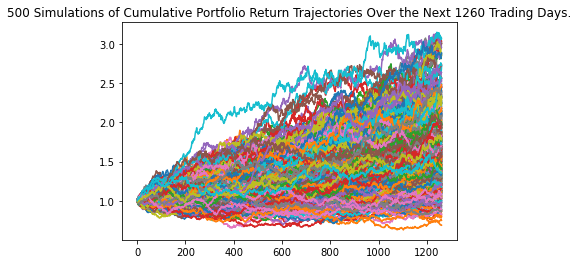

In [26]:
# Plot simulation outcomes
MC_5.plot_simulation();

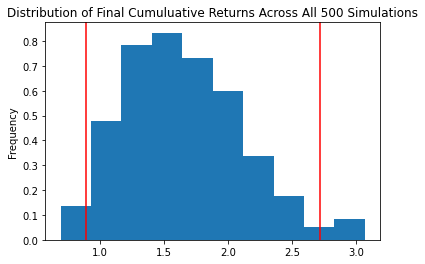

In [27]:
# Plot probability distribution and confidence intervals
MC_5.plot_distribution();

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_MC_5 = MC_5.summarize_cumulative_return()
# Print summary statistics
display(summary_MC_5)

count           500.000000
mean              1.658975
std               0.461582
min               0.690202
25%               1.304833
50%               1.613668
75%               1.969442
max               3.065529
95% CI Lower      0.887661
95% CI Upper      2.716916
Name: 1260, dtype: float64

In [29]:
# Set initial investment
initial_investment = 60_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * summary_MC_5[8]
ci_upper = initial_investment * summary_MC_5[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower, 2)} and ${round(ci_upper, 2)}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $53259.68 and $163014.95


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10 = MCSimulation(df_stock_data, weights = [0.4, 0.6], num_simulation=500, num_trading_days=252*10)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jordandass/Desktop/monash-fintech/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001820,0.997143,1.006477,1.018335,0.993695,0.998551,1.018045,1.011580,1.000347,0.998977,...,0.999000,0.998326,1.006588,1.003074,1.002750,0.994270,1.009581,1.007638,1.009301,0.995826
2,1.005645,0.994587,0.990134,1.010479,1.006462,1.004888,1.016205,1.024351,0.991832,1.004028,...,1.002009,0.994476,1.013921,1.006083,1.015888,0.988129,1.013910,1.001498,1.011013,1.008052
3,1.019675,0.996332,0.978385,1.022349,0.996631,1.005813,1.015323,1.023065,0.991863,1.010765,...,1.007411,1.003699,1.017920,1.007224,1.009447,0.987496,1.011734,1.004499,1.009884,1.015264
4,1.012161,0.985030,0.974713,1.026023,0.991909,1.005624,0.990622,1.018637,0.988960,0.996768,...,1.007188,1.001280,1.002721,1.016994,1.005847,0.995328,1.011487,1.000687,1.016484,1.014027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.126777,2.983441,2.351534,6.164335,2.159080,2.706541,2.480171,1.783999,2.732637,1.674886,...,3.794701,4.783707,3.043071,2.887138,1.982470,3.265168,4.250277,1.519200,2.502072,3.389289
2517,2.139798,3.000485,2.346267,6.182308,2.182979,2.717500,2.487621,1.774746,2.721365,1.680264,...,3.823881,4.784249,3.006240,2.921358,1.992400,3.238227,4.209780,1.534417,2.470161,3.397286
2518,2.170161,2.987625,2.337413,6.182978,2.227568,2.699648,2.489712,1.766915,2.699593,1.672734,...,3.837877,4.818862,2.960678,2.929634,1.989431,3.278731,4.209478,1.559599,2.457082,3.386986
2519,2.188095,2.988308,2.357946,6.150152,2.230926,2.688167,2.463652,1.773903,2.721830,1.674150,...,3.787967,4.787337,2.951267,2.957378,2.011474,3.271590,4.218223,1.558694,2.451403,3.365773


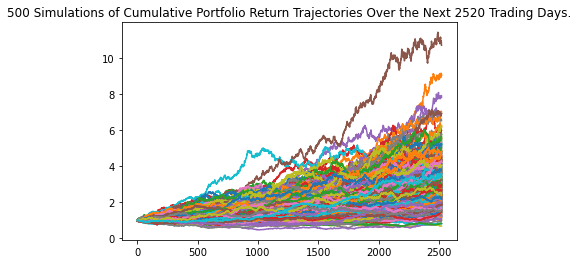

In [32]:
# Plot simulation outcomes
MC_10.plot_simulation();

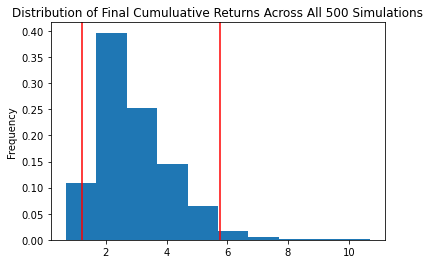

In [33]:
# Plot probability distribution and confidence intervals
MC_10.plot_distribution();

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_MC_10 = MC_10.summarize_cumulative_return()

# Print summary statistics
display(summary_MC_10)

count           500.000000
mean              2.944018
std               1.248992
min               0.680083
25%               2.060530
50%               2.679429
75%               3.602064
max              10.703847
95% CI Lower      1.224765
95% CI Upper      5.743239
Name: 2520, dtype: float64

In [35]:
# Set initial investment
initial_investment = 60_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * summary_MC_10[8]
ci_upper = initial_investment * summary_MC_10[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower, 2)} and ${round(ci_upper, 2)}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $73485.9 and $344594.32
